### Project title: Abalone Age Prediction

### 1. Problem Definition

Predict the age of abalone mollusks based on the attributes.

> Age is calculated by adding +1.5 to the number of rings.

### 2. Features

The data consists of 9 features:

- Sex (M-Male, F-Female, I-Infant)
- Length (longest shell measurement)
- Diameter (perpendicular to length)
- Height (with meat in shell)
- Whole weight (swhole abalone)
- Shucked weight (weight of meat)
- Viscera weight (gut weight after bleeding)
- Shell weight (after being dried)
- Rings (+1.5 gives the age in years)

### 3. Approach

To solve this problem, we are going to do the following steps:

- Explore and get familiar with the data
- Visualize data
- Model data, then clean and transform data to make it suitable for machine learning
- Choose a machine learning model and train it
- Evaluate the scores
- Tune hyperparameters
- Evaluate and compare the scores
- Visualize the results


In [62]:
# Import the tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


# Exploratory Data Analysis (EDA)


In [63]:
# import data
data = pd.read_csv("abalone.csv")


In [64]:
# see the whole dataframe
data


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [65]:
# check data info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [66]:
# Check for missing values
data.isna().sum()


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

[Text(0.5, 1.0, 'Sex and Nr. of Rings'),
 Text(0.5, 0, 'Sex'),
 Text(0, 0.5, 'Number of rings')]

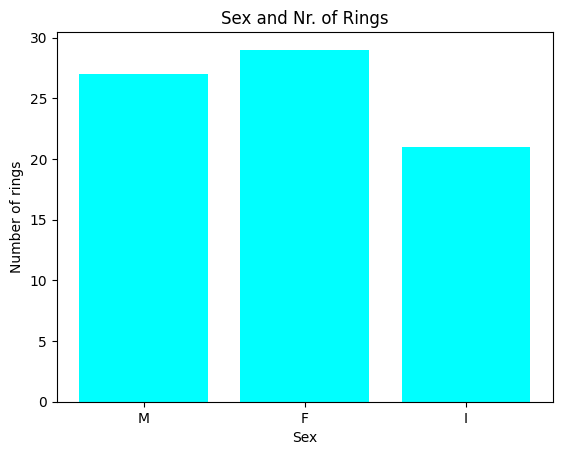

In [67]:
#Plot a graph between Sex and No. of Rings
fig, ax = plt.subplots()

ax.bar(data["Sex"], data["Rings"], color="cyan")

ax.set(title="Sex and Nr. of Rings",
       xlabel="Sex",
       ylabel="Number of rings")


### Diameter and Rings scatter plot


[Text(0.5, 1.0, 'Diameter and Nr. of Rings'),
 Text(0.5, 0, 'Diameter'),
 Text(0, 0.5, 'Nr. of Rings')]

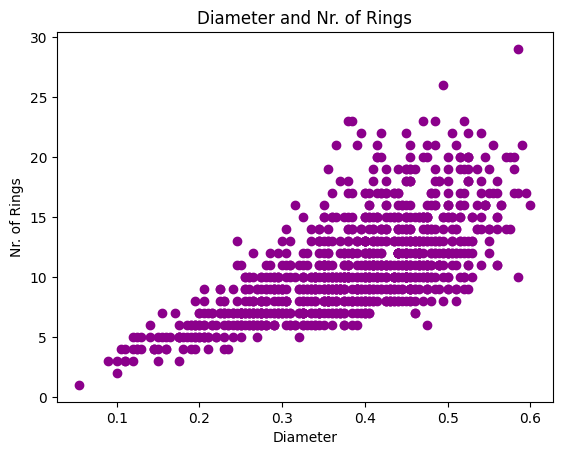

In [68]:
#Plotting a scatter plot between the diameter and no. of rings of the abolone 
fig, ax = plt.subplots()
ax.scatter(data["Diameter"][:1000], data["Rings"][:1000], color="darkmagenta")
ax.set(title="Diameter and Nr. of Rings",
       xlabel="Diameter",
       ylabel="Nr. of Rings")


### Whole weight and nr. of rings scatter plot

Here we try to find the relationship between whole weight and number of rings


[Text(0.5, 1.0, 'Whole weight and Nr. of Rings'),
 Text(0.5, 0, 'Whole weight'),
 Text(0, 0.5, 'Number of rings')]

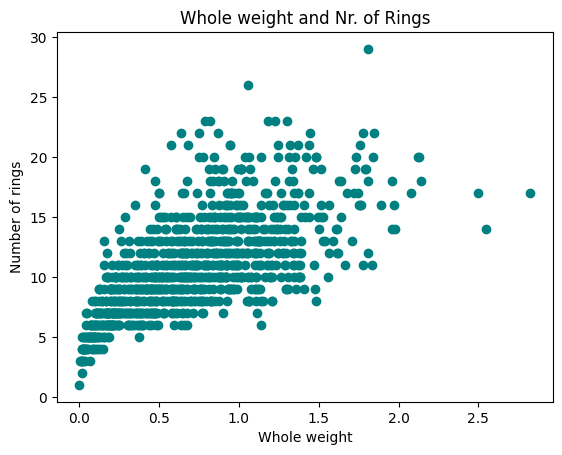

In [69]:
# Create fig, ax
fig, ax = plt.subplots()

# Create scatter plot of first 1000 data points
ax.scatter(data["Whole weight"][:1000], data["Rings"][:1000], color="teal")

# Create a legend
ax.set(title="Whole weight and Nr. of Rings",
       xlabel="Whole weight",
       ylabel="Number of rings")


**Conclusion** : We can see from the data visualization that larger the diameter and weight of an abalone shell, the more likely it is to have more rings. Female molluscs also have a slight tendency to live longer than male molluscs.

## Data Preprocessing

Here is what we have to do:

- Make sure there are no missing values
- Make sure all our data is numerical
- Create `Age` column
- Drop `Rings` column


In [70]:
#Ensuring there are no missing values
data.isna().sum()


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [71]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Here above we see that the gender column is not set to a numerical value, so we use some label encoding to rectify that.


### Label encoding


In [72]:
#Encoding/converting object(M/F/I) to numerical format
from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()
data["Sex"] = l_encoder.fit_transform(data["Sex"])

In [73]:
#Converted data being displayed
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [74]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


Our initial task was to determine the age of the abalone based on the number of rings. We know that age is determined by the number of rings + 1.5. Therefore, we need to create a new ["Age"] column in our data and drop the ["Rings"] column.


In [75]:
#Converting the Parameter(no. of rings) to parameter(age)
data["Age"] = data["Rings"] + 1.5
data.drop("Rings", axis=1, inplace=True)


In [76]:
data.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


## Build a machine learning model


In [77]:
# Split data into X and y
X = data.drop("Age", axis=1)
y = data["Age"]

In [78]:
X.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


1, 0.490, 0.395, 0.185, 0.4160, 0.2455, 0.1320, 0.175

In [79]:
#Displaying Y head - Age
y.head()


0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

In [80]:
#Splitting the model into 80-20 Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,  # test_size=0.2 means that we use 20% of data for test set
                                                    random_state=14)  # we choose a random number for random_state to make our results reproducable


In [81]:
len(X_train), len(y_train), len(X_test), len(y_test)


(3341, 3341, 836, 836)

# Choosing a model

## 1. Random Forest Regressor


In [82]:
# import model
from sklearn.ensemble import RandomForestRegressor

# instantiate model
rf = RandomForestRegressor(n_jobs=-1,  # n_jobs=-1 means that we are using all computer power to fit the model
                           random_state=14)


Accuracy Metrics:

1. Mean Absolute Error (MAE)
2. Mean Square Error (MSE)
3. Root Mean Square Error (RMSE)
4. R2 Score


In [83]:
# import the evaluation metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error

# create an evaluation function


def show_score(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Test MAE": mean_absolute_error(y_test, test_preds),
              "Training MSE": mean_squared_log_error(y_train, train_preds),
              "Test MSE": mean_squared_log_error(y_test, test_preds),
              "Training RMSE": np.sqrt(mean_squared_log_error(y_train, train_preds)),
              "Test RMSE": np.sqrt(mean_squared_log_error(y_test, test_preds)),
              "Training R2": r2_score(y_train, train_preds),
              "Test R2": r2_score(y_test, test_preds)}
    return scores


In [84]:
# fit the model
rf.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=14)

In [85]:
show_score(rf)

{'Training MAE': 0.5804040706375337,
 'Test MAE': 1.5157296650717704,
 'Training MSE': 0.003402556410425284,
 'Test MSE': 0.024190290175117212,
 'Training RMSE': 0.058331435868023036,
 'Test RMSE': 0.1555322801707646,
 'Training R2': 0.9357057341721267,
 'Test R2': 0.5253587245211205}

We can see the training accuracy is higher than test data.


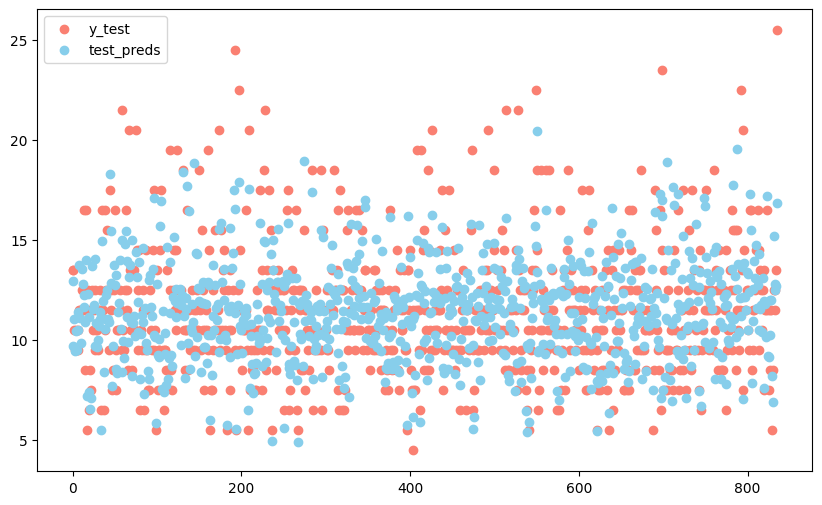

In [86]:
# Predict the labels on test data
test_preds = rf.predict(X_test)

# Visualize predictions vs true labels
fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color="salmon", label="y_test")
plt.scatter(range(y_test.shape[0]), test_preds,
            color="skyblue", label="test_preds")
plt.legend()

In [87]:
# Predict the labels on input data from user
input_data_rf = np.array([[1, 0.490, 0.395, 0.185, 0.4160, 0.2455, 0.1320, 0.175]])
predictionrf = rf.predict(input_data_rf)

print("\n Predicted data the for the input from the user is:", predictionrf, "\n")


 Predicted data the for the input from the user is: [11.93] 



/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Hyperparameter Tuning

### We have used Random search grid using sklearn's RandomizedSearchCV.


In [88]:
# Check current parameters
from pprint import pprint

print("Current parameters:")
pprint(rf.get_params())


Current parameters:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 14,
 'verbose': 0,
 'warm_start': False}


In [89]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": [20, 100, 200],
           "max_depth": [None, 1, 2, 5],
           "max_features": [0.5, 1, "auto", "sqrt"],
           "min_samples_split": [2, 5, 10],
           "min_samples_leaf": [1, 2, 3, 5]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=14),
                              param_distributions=rf_grid,
                              n_iter=100,  # n_iter = 100 means that the model will fit 100 for different combinations of parameters
                              cv=5,  # number of cross-validation folds for each set of parameters
                              verbose=True)  # requesting more elaborate output in the log

rs_model.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
110 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/opt/homebrew/lib/python3.11/site-packag

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=14),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 1, 2, 5],
                                        'max_features': [0.5, 1, 'auto',
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 100, 200]},
                   verbose=True)

In [90]:
rs_model.best_params_ # get the best params obtained from GridSearch

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_features': 0.5,
 'max_depth': None}

In [91]:
ideal_model = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, min_samples_leaf=5, max_features= 0.5, max_depth = None)
ideal_model.fit(X_train, y_train)
rf_score = show_score(ideal_model)
rf_score

{'Training MAE': 1.0869830304390524,
 'Test MAE': 1.4465399853303944,
 'Training MSE': 0.01197486305331431,
 'Test MSE': 0.022058291718686993,
 'Training RMSE': 0.1094297174140293,
 'Test RMSE': 0.14852034109402992,
 'Training R2': 0.7661319724202019,
 'Test R2': 0.5649512179927476}

In [92]:
# Score of original RandomForest model
show_score(rf)

{'Training MAE': 0.5804040706375337,
 'Test MAE': 1.5157296650717704,
 'Training MSE': 0.003402556410425284,
 'Test MSE': 0.024190290175117212,
 'Training RMSE': 0.058331435868023036,
 'Test RMSE': 0.1555322801707646,
 'Training R2': 0.9357057341721267,
 'Test R2': 0.5253587245211205}

#### Result: Hence, Random Forest is not upto the mark for the Abalone dataset. Thus, we move on to explore other models


### Gradient Boosting


In [93]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)


GradientBoostingRegressor()

In [94]:
show_score(gbr)

{'Training MAE': 1.3657546068704591,
 'Test MAE': 1.477227503454939,
 'Training MSE': 0.01879283231535459,
 'Test MSE': 0.023566395458248072,
 'Training RMSE': 0.13708695165972065,
 'Test RMSE': 0.1535135025274587,
 'Training R2': 0.6601099784599969,
 'Test R2': 0.5345914521684378}

In [96]:
gbr.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [97]:
gbr_grid = {"n_estimators": [20, 100, 200],
           "max_depth": [None, 1, 2, 5],
           "max_features": [0.5, 1, "auto", "sqrt"],
           "min_samples_split": [2, 5, 10],
           "min_samples_leaf": [1, 2, 3, 5]}

gbs_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=14),
                              param_distributions=gbr_grid,
                              n_iter=100,  # n_iter = 100 means that the model will fit 100 for different combinations of parameters
                              cv=5,  # number of cross-validation folds for each set of parameters
                              verbose=True)  # requesting more elaborate output in the log

gbs_model.fit(X_train, y_train)

gbs_model.best_params_ # get the best params obtained from GridSearch

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
110 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/opt/homebrew/lib/python3.11/site-packag

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 0.5,
 'max_depth': 5}

In [98]:
ideal_model = GradientBoostingRegressor(n_estimators = 100, min_samples_split = 10, min_samples_leaf=5, max_features= 0.5, max_depth = 5)
ideal_model.fit(X_train, y_train)
gbr_score = show_score(ideal_model)
gbr_score

{'Training MAE': 1.1915828343438615,
 'Test MAE': 1.4638689240330316,
 'Training MSE': 0.014364887003133068,
 'Test MSE': 0.022839620077080278,
 'Training RMSE': 0.11985360655037906,
 'Test RMSE': 0.15112782694487564,
 'Training R2': 0.7437087761011492,
 'Test R2': 0.5468695006164538}

#### Decision tree regressor

In [99]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [100]:
show_score(dtr)

{'Training MAE': 0.0,
 'Test MAE': 2.1543062200956937,
 'Training MSE': 0.0,
 'Test MSE': 0.04842033053652147,
 'Training RMSE': 0.0,
 'Test RMSE': 0.22004620091362967,
 'Training R2': 1.0,
 'Test R2': 0.006772880793067593}

In [102]:
dtr.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [103]:
dtr_grid = {"max_depth": [None, 1, 2, 5, 7],
           "max_features": [0.5, 1, "auto", "sqrt"],
           "min_samples_split": [2, 5, 10],
           "min_samples_leaf": [1, 2, 3, 5]}

dtr_model = RandomizedSearchCV(DecisionTreeRegressor(),
                              param_distributions=dtr_grid,
                              n_iter=100,  # n_iter = 100 means that the model will fit 100 for different combinations of parameters
                              cv=5,  # number of cross-validation folds for each set of parameters
                              verbose=True)  # requesting more elaborate output in the log

dtr_model.fit(X_train, y_train)
dtr_model.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
155 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
155 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/opt/homebrew/lib/python3.11/site-packag

{'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 0.5,
 'max_depth': 5}

In [104]:
ideal_model = DecisionTreeRegressor(min_samples_split = 5, min_samples_leaf= 5, max_features= 0.5, max_depth = 7)
ideal_model.fit(X_train, y_train)
dtr_score = show_score(ideal_model)
dtr_score

{'Training MAE': 1.46900238437668,
 'Test MAE': 1.635441992738768,
 'Training MSE': 0.021611859843957536,
 'Test MSE': 0.027533556077576512,
 'Training RMSE': 0.14700972703857912,
 'Test RMSE': 0.16593238405319352,
 'Training R2': 0.5951372332044185,
 'Test R2': 0.46710954351946077}

In [105]:
print("Here are the final train and test R2 scores after grid search:")
print("Random Forest;            Train:", rf_score.get("Training R2"), "     Test: ", rf_score.get("Test R2"))
print("Gradient Boosting;        Train:", gbr_score.get("Training R2"), "     Test: ", gbr_score.get("Test R2"))
print("Decision Tree Regressor;  Train:", dtr_score.get("Training R2"), "     Test: ", dtr_score.get("Test R2"))

Here are the final train and test R2 scores after grid search:
Random Forest;            Train: 0.7661319724202019      Test:  0.5649512179927476
Gradient Boosting;        Train: 0.7437087761011492      Test:  0.5468695006164538
Decision Tree Regressor;  Train: 0.5951372332044185      Test:  0.46710954351946077


### Hence, The best model out of the three after hyperparameter tuning is Random Forest.